# Import Libraries

In [287]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data

In [288]:
data = pd.read_csv('blend.csv')

In [289]:
data.head()

,AF,AV,AC,SR,CL,FSO,TSO,D,PH,S,OH,Target,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [290]:
data.columns

Index(['AF', 'AV', 'AC', 'SR', 'CL', 'FSO', 'TSO', 'D', 'PH', 'S', 'OH',
       'Target', 'type'],
      dtype='object')

In [291]:
#separate categorical features from dataframe
target_dummy = data['Target']
type_dummy = data['type']

In [292]:
#converting categorical to dummies
target_dummy = pd.get_dummies(data['Target'])
#type_dummy = pd.get_dummies(data['type'])

In [293]:
#column names to dummies
target_dummy.columns = ['target3','target4','target5','target6','target7','target8','target9'] 
#type_dummy.columns = ['type1','type2']

In [294]:
#concatenating data and target_dummy
#data = pd.concat((data,target_dummy),axis=1)

In [295]:
#check the dataframe
data.head()

,AF,AV,AC,SR,CL,FSO,TSO,D,PH,S,OH,Target,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [296]:
#drop the excess features from data
data = data.drop(['Target','type'], axis=1)

In [255]:
#drop excess features from type and Target
#type_dummy = type_dummy.drop(['type2'],axis=1)
#target_dummy = target_dummy.drop(['target9'],axis=1)
#do not drop else you will have an error as

#ValueError: Wrong number of items passed 1950, placement implies 1

# Data preparation

In [297]:
#scale the remaining data
from sklearn.preprocessing import StandardScaler

In [298]:
scaler = StandardScaler()

In [299]:
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [300]:
scaled_data = scaler.transform(data)

In [301]:
scaled_data

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  1.81308951,
         0.19309677, -0.91546416],
       [ 0.45103572,  3.28223494, -2.19283252, ..., -0.11507303,
         0.99957862, -0.58006813],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.25811972,
         0.79795816, -0.58006813],
       ..., 
       [-0.55179227, -0.6054167 , -0.88525328, ..., -1.42124765,
        -0.47897144, -0.91546416],
       [-1.32319841, -0.30169391, -0.12823371, ...,  0.75571005,
        -1.016626  ,  1.9354021 ],
       [-0.93749534, -0.78765037,  0.42232597, ...,  0.25811972,
        -1.41986693,  1.09691202]])

In [302]:
scaled_data_frame = pd.DataFrame(scaled_data)

In [303]:
scaled_data_frame.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464


In [304]:
scaled_data_frame.columns = ['AF', 'AV', 'AC', 'SR', 'CL', 'FSO', 'TSO', 'D', 'PH', 'S', 'OH']

In [305]:
#concat data frame
final_data = pd.concat((scaled_data_frame,target_dummy),axis=1)
final_data.head()

,AF,AV,AC,SR,CL,FSO,TSO,D,PH,S,OH,target3,target4,target5,target6,target7,target8,target9
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,0,0,1,0,0,0,0
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,0,0,1,0,0,0,0
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,0,0,1,0,0,0,0
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0,0,0,1,0,0,0
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,0,0,1,0,0,0,0


# Train test split

In [306]:
from sklearn.model_selection import train_test_split

In [307]:
X_train, X_test, y_train, y_test = train_test_split(final_data, type_dummy, test_size=0.30, random_state=42)

# KNN classifier

In [308]:
from sklearn.neighbors import KNeighborsClassifier

In [309]:
knn = KNeighborsClassifier(n_neighbors=1)

In [310]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [311]:
predictions_train = knn.predict(X_train)

In [312]:
predictions_test = knn.predict(X_test)

# Predictions and Evaluations

In [313]:
from sklearn.metrics import classification_report,confusion_matrix

In [314]:
print(confusion_matrix(y_train,predictions_train))

[[1096    1]
 [   1 3449]]


In [315]:
print(confusion_matrix(y_test,predictions_test))
#ValueError: multilabel-indicator is not supported

[[ 495    7]
 [   9 1439]]


In [316]:
print(classification_report(y_train,predictions_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1097
          1       1.00      1.00      1.00      3450

avg / total       1.00      1.00      1.00      4547



In [317]:
print(classification_report(y_test,predictions_test))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       502
          1       1.00      0.99      0.99      1448

avg / total       0.99      0.99      0.99      1950



# Choosing K-Value

In [325]:
error_rate_train = []
error_rate_test = []

# for different values of k
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_train_i = knn.predict(X_train)
    pred_test_i = knn.predict(X_test)
    error_rate_train.append(np.mean(pred_train_i != y_train))
    error_rate_test.append(np.mean(pred_test_i != y_test))

Text(0,0.5,'Error Rate')

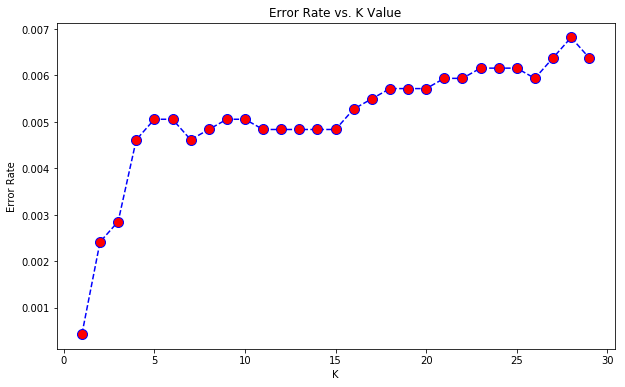

In [326]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate_train,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0,0.5,'Error Rate')

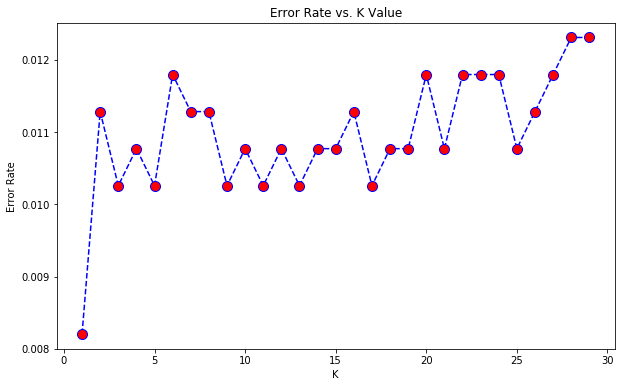

In [327]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate_test,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [329]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=4')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=4


[[ 493    9]
 [  12 1436]]


             precision    recall  f1-score   support

          0       0.98      0.98      0.98       502
          1       0.99      0.99      0.99      1448

avg / total       0.99      0.99      0.99      1950

